In [1]:
import pandas as pd

log_path = "credit_predictions_log.csv"

df_log = pd.read_csv(log_path, parse_dates=["timestamp"])
df_log.head()


,timestamp,age,income,loan_amount,loan_duration_months,num_delinquencies,utilization_rate,num_open_accounts,previous_default,home_ownership,employment_status,default_probability,predicted_default
0,2025-11-23 15:36:35.959217,0.0,0.0,0.0,0,0,0.00,0,0,string,string,0.304709,0
1,2025-11-23 15:46:35.557877,45.0,65000.0,15000.0,36,1,0.45,5,0,MORTGAGE,EMPLOYED,0.571702,1


In [2]:
print("Number of logged predictions:", len(df_log))
df_log.describe(include='all').transpose()


Number of logged predictions: 2


,count,unique,top,freq,mean,min,25%,50%,75%,max,std
timestamp,2,NaN,NaN,NaN,2025-11-23 15:41:35.758546944,2025-11-23 15:36:35.959217,2025-11-23 15:39:05.858881792,2025-11-23 15:41:35.758546944,2025-11-23 15:44:05.658212096,2025-11-23 15:46:35.557877,NaN
age,2.0,NaN,NaN,NaN,22.5,0.0,11.25,22.5,33.75,45.0,31.819805
income,2.0,NaN,NaN,NaN,32500.0,0.0,16250.0,32500.0,48750.0,65000.0,45961.940777
loan_amount,2.0,NaN,NaN,NaN,7500.0,0.0,3750.0,7500.0,11250.0,15000.0,10606.601718
loan_duration_months,2.0,NaN,NaN,NaN,18.0,0.0,9.0,18.0,27.0,36.0,25.455844
num_delinquencies,2.0,NaN,NaN,NaN,0.5,0.0,0.25,0.5,0.75,1.0,0.707107
utilization_rate,2.0,NaN,NaN,NaN,0.225,0.0,0.1125,0.225,0.3375,0.45,0.318198
num_open_accounts,2.0,NaN,NaN,NaN,2.5,0.0,1.25,2.5,3.75,5.0,3.535534
previous_default,2.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
home_ownership,2,2,string,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
print("Overall predicted default rate:",
      df_log["predicted_default"].mean().round(3))

print("Average predicted probability:",
      df_log["default_probability"].mean().round(3))


Overall predicted default rate: 0.5
Average predicted probability: 0.438


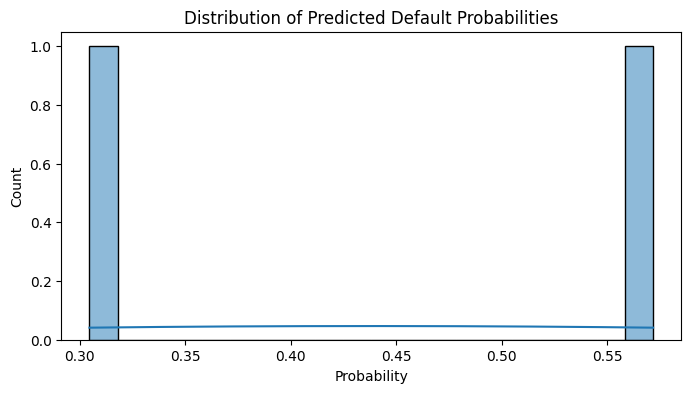

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,4))
sns.histplot(df_log["default_probability"], kde=True, bins=20)
plt.title("Distribution of Predicted Default Probabilities")
plt.xlabel("Probability")
plt.ylabel("Count")
plt.show()


In [13]:
df_log["income_group"] = pd.cut(
    df_log["income"],
    bins=[0, 30000, 60000, 90000, 200000],
    labels=["low", "medium", "high", "very_high"]
)

df_log.groupby("income_group")["predicted_default"].mean()


C:\Users\solom\AppData\Local\Temp\ipykernel_12932\1895173313.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_log.groupby("income_group")["predicted_default"].mean()


income_group
low          1.000000
medium       1.000000
high         0.857143
very_high    0.833333
Name: predicted_default, dtype: float64

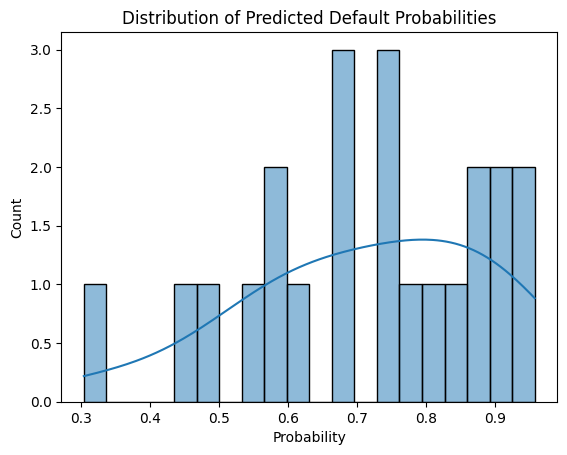

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the plot directly (no need for plt.figure here)
sns.histplot(df_log["default_probability"], kde=True, bins=20)
plt.title("Distribution of Predicted Default Probabilities")
plt.xlabel("Probability")
plt.ylabel("Count")

# Save the plot before showing
plt.savefig(r"C:\Users\solom\OneDrive\Desktop\Data_scientist_Roadmap\default_probability_distribution.png",
            dpi=300, bbox_inches="tight")

plt.show()


In [14]:
df_log["age_bin"] = pd.qcut(df_log["age"], q=10, duplicates='drop')

df_log.groupby("age_bin")["default_probability"].mean()


C:\Users\solom\AppData\Local\Temp\ipykernel_12932\277036976.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_log.groupby("age_bin")["default_probability"].mean()


age_bin
(-0.001, 22.3]    0.695444
(22.3, 26.0]      0.799520
(26.0, 28.7]           NaN
(28.7, 36.0]      0.596478
(36.0, 43.0]      0.914821
(43.0, 45.6]      0.764858
(45.6, 51.1]      0.710022
(51.1, 60.6]      0.762588
(60.6, 62.8]      0.670463
(62.8, 67.0]      0.653715
Name: default_probability, dtype: float64

In [10]:
import requests
import random
import pandas as pd

API_URL = "http://127.0.0.1:8000/predict"

home_options = ["RENT", "MORTGAGE", "OWN"]
employment_options = ["EMPLOYED", "SELF_EMPLOYED", "UNEMPLOYED", "STUDENT", "RETIRED"]

def make_random_applicant():
    """
    Create one synthetic but reasonable credit applicant.
    """
    age = random.randint(21, 70)
    income = random.randint(20000, 140000)
    loan_amount = random.randint(2000, 40000)
    loan_duration_months = random.choice([12, 24, 36, 48, 60])
    num_delinquencies = random.randint(0, 4)
    utilization_rate = round(random.uniform(0.05, 0.95), 2)
    num_open_accounts = random.randint(1, 10)
    previous_default = random.choice([0, 1])
    home_ownership = random.choice(home_options)
    employment_status = random.choice(employment_options)

    return {
        "age": age,
        "income": income,
        "loan_amount": loan_amount,
        "loan_duration_months": loan_duration_months,
        "num_delinquencies": num_delinquencies,
        "utilization_rate": utilization_rate,
        "num_open_accounts": num_open_accounts,
        "previous_default": previous_default,
        "home_ownership": home_ownership,
        "employment_status": employment_status
    }

responses = []

for i in range(20):
    applicant = make_random_applicant()
    r = requests.post(API_URL, json=applicant)
    if r.status_code == 200:
        data = r.json()
        print(f"{i+1:02d}. prob={data['default_probability']:.3f}, pred={data['predicted_default']}, input={applicant}")
        responses.append({**applicant, **data})
    else:
        print(f"{i+1:02d}. ERROR status={r.status_code}, body={r.text}")

len(responses)


01. prob=0.436, pred=0, input={'age': 36, 'income': 119736, 'loan_amount': 17430, 'loan_duration_months': 48, 'num_delinquencies': 0, 'utilization_rate': 0.82, 'num_open_accounts': 3, 'previous_default': 1, 'home_ownership': 'MORTGAGE', 'employment_status': 'EMPLOYED'}
02. prob=0.668, pred=1, input={'age': 46, 'income': 115195, 'loan_amount': 36473, 'loan_duration_months': 24, 'num_delinquencies': 1, 'utilization_rate': 0.1, 'num_open_accounts': 9, 'previous_default': 0, 'home_ownership': 'OWN', 'employment_status': 'SELF_EMPLOYED'}
03. prob=0.915, pred=1, input={'age': 42, 'income': 59363, 'loan_amount': 37903, 'loan_duration_months': 60, 'num_delinquencies': 4, 'utilization_rate': 0.89, 'num_open_accounts': 2, 'previous_default': 0, 'home_ownership': 'RENT', 'employment_status': 'STUDENT'}
04. prob=0.752, pred=1, input={'age': 49, 'income': 67955, 'loan_amount': 27056, 'loan_duration_months': 60, 'num_delinquencies': 0, 'utilization_rate': 0.18, 'num_open_accounts': 1, 'previous_defa

20

In [15]:
df_log = pd.read_csv("credit_predictions_log.csv")
df_log.tail()
len(df_log)


22

In [17]:
#fraction of applicants flagged as default.
df_log["predicted_default"].mean()


0.8636363636363636

Total logged predictions: 22

Overall Default Rate: 86.36%
Average Predicted Default Probability: 0.717

Summary of predicted default probabilities:
count    22.000000
mean      0.716622
std       0.176209
min       0.304709
25%       0.595659
50%       0.751388
75%       0.859862
max       0.958014
Name: default_probability, dtype: float64

Default rate by income group:
income_group
Low Income (<40k)       1.000000
Mid Income (40k-80k)    1.000000
High Income (>80k)      0.714286
Name: predicted_default, dtype: float64

Classification rate by threshold:
   threshold  fraction_classified_default
0        0.5                     0.863636
1        0.7                     0.545455
2        0.9                     0.181818


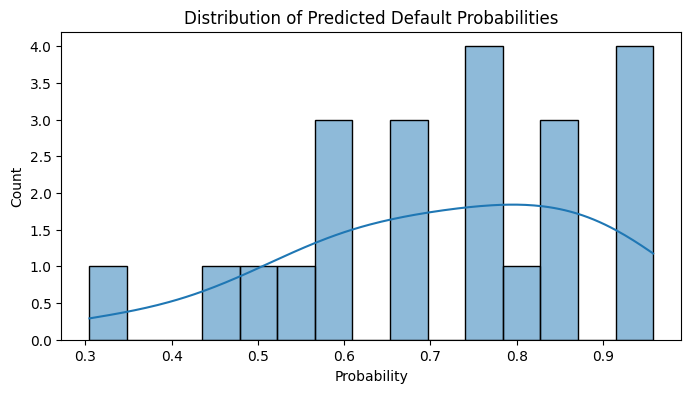


✅ Saved probability distribution plot to: monitoring_outputs\probability_distribution.png


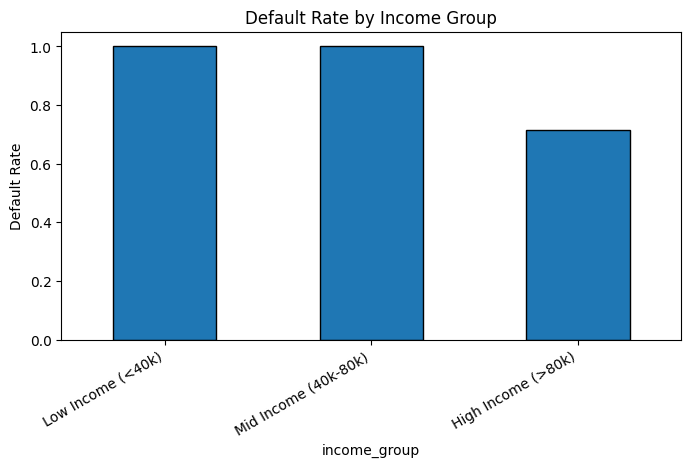

✅ Saved income-group plot to: monitoring_outputs\default_rate_by_income_group.png
✅ Saved income-group default rates to: monitoring_outputs\default_rate_by_income_group.csv
✅ Saved threshold sensitivity to: monitoring_outputs\threshold_sensitivity.csv
✅ Saved monitoring summary JSON to: monitoring_outputs\monitoring_summary.json


In [19]:
#monitoring
import os
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# -------------------------------
# CONFIG: where to save outputs
# -------------------------------
LOG_PATH = "credit_predictions_log.csv"
OUTPUT_DIR = "monitoring_outputs"

os.makedirs(OUTPUT_DIR, exist_ok=True)

# -------------------------------
# 1) Load log
# -------------------------------
df_log = pd.read_csv(LOG_PATH)
print("Total logged predictions:", len(df_log))

# -------------------------------
# 2) Core metrics
# -------------------------------
overall_default_rate = df_log["predicted_default"].mean()
avg_default_proba = df_log["default_probability"].mean()

print(f"\nOverall Default Rate: {overall_default_rate:.2%}")
print(f"Average Predicted Default Probability: {avg_default_proba:.3f}")

print("\nSummary of predicted default probabilities:")
print(df_log["default_probability"].describe())

# -------------------------------
# 3) Income groups + default rate
# -------------------------------
df_log["income_group"] = pd.cut(
    df_log["income"],
    bins=[0, 40000, 80000, np.inf],
    labels=["Low Income (<40k)", "Mid Income (40k-80k)", "High Income (>80k)"]
)

income_group_default = df_log.groupby(
    "income_group", observed=False
)["predicted_default"].mean()

print("\nDefault rate by income group:")
print(income_group_default)

# -------------------------------
# 4) Threshold comparison
# -------------------------------
thresholds = [0.5, 0.7, 0.9]
threshold_results = []

for t in thresholds:
    frac_default = (df_log["default_probability"] >= t).mean()
    threshold_results.append({"threshold": t, "fraction_classified_default": frac_default})

threshold_df = pd.DataFrame(threshold_results)

print("\nClassification rate by threshold:")
print(threshold_df)

# -------------------------------
# 5) Plot: probability distribution
# -------------------------------
plt.figure(figsize=(8, 4))
sns.histplot(df_log["default_probability"], kde=True, bins=15)
plt.title("Distribution of Predicted Default Probabilities")
plt.xlabel("Probability")
plt.ylabel("Count")

prob_plot_path = os.path.join(OUTPUT_DIR, "probability_distribution.png")
plt.savefig(prob_plot_path, bbox_inches="tight", dpi=150)
plt.show()
print(f"\n✅ Saved probability distribution plot to: {prob_plot_path}")

# -------------------------------
# 6) Plot: default rate by income group
# -------------------------------
plt.figure(figsize=(8, 4))
income_group_default.plot(kind="bar", edgecolor="black")
plt.title("Default Rate by Income Group")
plt.ylabel("Default Rate")
plt.xticks(rotation=30, ha="right")

income_plot_path = os.path.join(OUTPUT_DIR, "default_rate_by_income_group.png")
plt.savefig(income_plot_path, bbox_inches="tight", dpi=150)
plt.show()
print(f"✅ Saved income-group plot to: {income_plot_path}")

# -------------------------------
# 7) Export metrics to disk
# -------------------------------

# Save per-income-group default rates
income_csv_path = os.path.join(OUTPUT_DIR, "default_rate_by_income_group.csv")
income_group_default.to_csv(income_csv_path, header=["default_rate"])
print(f"✅ Saved income-group default rates to: {income_csv_path}")

# Save threshold sensitivity
threshold_csv_path = os.path.join(OUTPUT_DIR, "threshold_sensitivity.csv")
threshold_df.to_csv(threshold_csv_path, index=False)
print(f"✅ Saved threshold sensitivity to: {threshold_csv_path}")

# Save a compact JSON summary
summary = {
    "total_predictions": int(len(df_log)),
    "overall_default_rate": float(overall_default_rate),
    "average_default_probability": float(avg_default_proba),
    "threshold_sensitivity": {
        str(row["threshold"]): float(row["fraction_classified_default"])
        for _, row in threshold_df.iterrows()
    }
}

summary_json_path = os.path.join(OUTPUT_DIR, "monitoring_summary.json")
with open(summary_json_path, "w", encoding="utf-8") as f:
    json.dump(summary, f, indent=2)

print(f"✅ Saved monitoring summary JSON to: {summary_json_path}")


In [20]:
#Monitoring dashboard
import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import timedelta

# Optional: for KS test; if not installed, comment out
try:
    from scipy.stats import ks_2samp
    SCIPY_AVAILABLE = True
except ImportError:
    SCIPY_AVAILABLE = False
    print("SciPy not installed – KS tests will be skipped.")

plt.rcParams["figure.figsize"] = (8, 4)

LOG_PATH = "credit_predictions_log.csv"
OUTPUT_DIR = "monitoring_dashboard_outputs"
os.makedirs(OUTPUT_DIR, exist_ok=True)

df_log = pd.read_csv(LOG_PATH, parse_dates=["timestamp"])
print("Total logged predictions:", len(df_log))
df_log.head()


Total logged predictions: 22


,timestamp,age,income,loan_amount,loan_duration_months,num_delinquencies,utilization_rate,num_open_accounts,previous_default,home_ownership,employment_status,default_probability,predicted_default
0,2025-11-23 15:36:35.959217,0.0,0.0,0.0,0,0,0.00,0,0,string,string,0.304709,0
1,2025-11-23 15:46:35.557877,45.0,65000.0,15000.0,36,1,0.45,5,0,MORTGAGE,EMPLOYED,0.571702,1
2,2025-11-23 16:08:00.471964,36.0,119736.0,17430.0,48,0,0.82,3,1,MORTGAGE,EMPLOYED,0.436319,0
3,2025-11-23 16:08:00.501976,46.0,115195.0,36473.0,24,1,0.10,9,0,OWN,SELF_EMPLOYED,0.667873,1
4,2025-11-23 16:08:00.528195,42.0,59363.0,37903.0,60,4,0.89,2,0,RENT,STUDENT,0.914821,1


In [21]:
#Core KPIs
overall_default_rate = df_log["predicted_default"].mean()
avg_default_proba = df_log["default_probability"].mean()

print(f"Overall Default Rate: {overall_default_rate:.2%}")
print(f"Average Predicted Default Probability: {avg_default_proba:.3f}\n")

print("Summary of predicted default probabilities:")
display(df_log["default_probability"].describe())


Overall Default Rate: 86.36%
Average Predicted Default Probability: 0.717

Summary of predicted default probabilities:


count    22.000000
mean      0.716622
std       0.176209
min       0.304709
25%       0.595659
50%       0.751388
75%       0.859862
max       0.958014
Name: default_probability, dtype: float64

In [22]:
##Income & Other Segments
# Income groups
df_log["income_group"] = pd.cut(
    df_log["income"],
    bins=[0, 40000, 80000, np.inf],
    labels=["Low (<40k)", "Mid (40–80k)", "High (>80k)"]
)

# Default rate by income group
income_default = df_log.groupby("income_group", observed=False)["predicted_default"].mean()

print("Default rate by income group:")
display(income_default)

# Default rate by previous default
prev_default_rate = df_log.groupby("previous_default")["predicted_default"].mean()
print("\nDefault rate by previous_default (0 = none, 1 = had default):")
display(prev_default_rate)

# Default rate by employment status
emp_default = df_log.groupby("employment_status")["predicted_default"].mean().sort_values(ascending=False)
print("\nDefault rate by employment_status:")
display(emp_default)


Default rate by income group:


income_group
Low (<40k)      1.000000
Mid (40–80k)    1.000000
High (>80k)     0.714286
Name: predicted_default, dtype: float64


Default rate by previous_default (0 = none, 1 = had default):


previous_default
0    0.833333
1    0.900000
Name: predicted_default, dtype: float64


Default rate by employment_status:


employment_status
SELF_EMPLOYED    1.000000
STUDENT          1.000000
UNEMPLOYED       1.000000
EMPLOYED         0.833333
RETIRED          0.750000
string           0.000000
Name: predicted_default, dtype: float64

In [23]:
##Threshold Sensitivity
thresholds = [0.5, 0.6, 0.7, 0.8, 0.9]
rows = []

for t in thresholds:
    frac_flagged = (df_log["default_probability"] >= t).mean()
    rows.append({"threshold": t, "fraction_classified_default": frac_flagged})

threshold_df = pd.DataFrame(rows)
print("Classification rate by threshold:")
display(threshold_df)


Classification rate by threshold:


,threshold,fraction_classified_default
0,0.5,0.863636
1,0.6,0.727273
2,0.7,0.545455
3,0.8,0.363636
4,0.9,0.181818


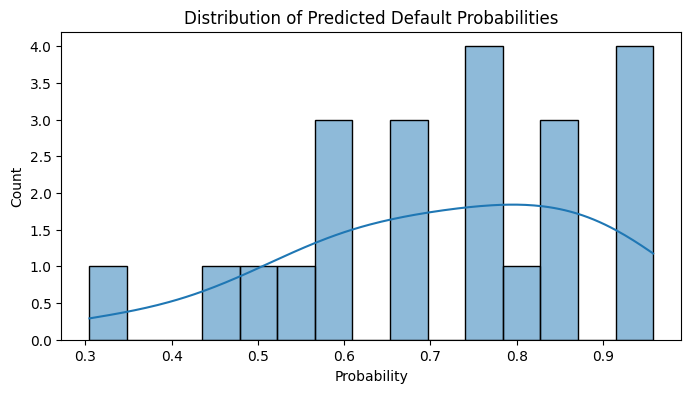

Saved: monitoring_dashboard_outputs\probability_distribution.png


In [25]:
#probability distribution Probability Distribution Plot (and save)
sns.histplot(df_log["default_probability"], kde=True, bins=15)
plt.title("Distribution of Predicted Default Probabilities")
plt.xlabel("Probability")
plt.ylabel("Count")

prob_plot_path = os.path.join(OUTPUT_DIR, "probability_distribution.png")
plt.savefig(prob_plot_path, bbox_inches="tight", dpi=150)
plt.show()

print("Saved:", prob_plot_path)


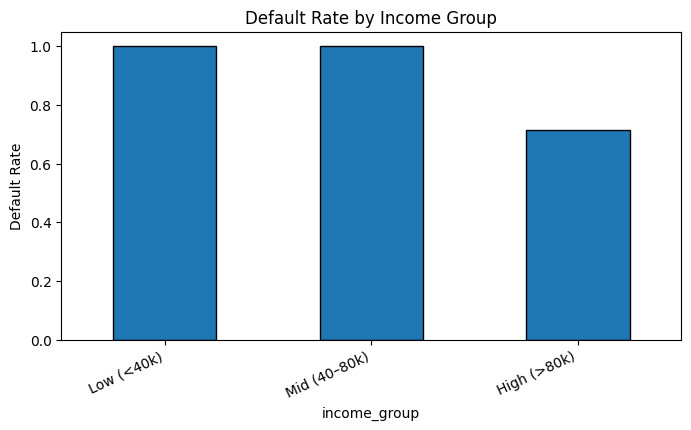

Saved: monitoring_dashboard_outputs\default_rate_by_income_group.png


In [26]:
#Default Rate by Income Group Plot (and save)
income_default.plot(kind="bar", edgecolor="black")
plt.title("Default Rate by Income Group")
plt.ylabel("Default Rate")
plt.xticks(rotation=25, ha="right")

income_plot_path = os.path.join(OUTPUT_DIR, "default_rate_by_income_group.png")
plt.savefig(income_plot_path, bbox_inches="tight", dpi=150)
plt.show()

print("Saved:", income_plot_path)

In [27]:
##Latency monitoring
if "latency_ms" in df_log.columns:
    print("Latency stats (ms):")
    display(df_log["latency_ms"].describe())

    sns.histplot(df_log["latency_ms"].dropna(), bins=15)
    plt.title("Prediction Latency Distribution (ms)")
    plt.xlabel("Latency (ms)")
    plt.ylabel("Count")

    lat_plot_path = os.path.join(OUTPUT_DIR, "latency_distribution.png")
    plt.savefig(lat_plot_path, bbox_inches="tight", dpi=150)
    plt.show()

    print("Saved:", lat_plot_path)
else:
    print("No 'latency_ms' column in log – skip latency monitoring.")


No 'latency_ms' column in log – skip latency monitoring.


In [28]:
##Simple drift checking
df_log = df_log.sort_values("timestamp").reset_index(drop=True)

mid_idx = len(df_log) // 2
old = df_log.iloc[:mid_idx]["default_probability"]
new = df_log.iloc[mid_idx:]["default_probability"]

print(f"Old window size: {len(old)}, New window size: {len(new)}")

# PSI-style binning
bins = np.linspace(0, 1, 11)
old_counts, _ = np.histogram(old, bins=bins)
new_counts, _ = np.histogram(new, bins=bins)

old_pct = old_counts / old_counts.sum()
new_pct = new_counts / new_counts.sum()

psi = np.sum((old_pct - new_pct) * np.log((old_pct + 1e-6) / (new_pct + 1e-6)))
print(f"\nPSI (approx): {psi:.4f}  (0–0.1 low, 0.1–0.25 moderate, >0.25 high drift)")

if SCIPY_AVAILABLE and len(old) > 0 and len(new) > 0:
    ks_stat, ks_p = ks_2samp(old, new)
    print(f"KS statistic: {ks_stat:.4f}, p-value: {ks_p:.4f}")
else:
    print("SciPy not available or insufficient data for KS test.")


Old window size: 11, New window size: 11

PSI (approx): 1.5005  (0–0.1 low, 0.1–0.25 moderate, >0.25 high drift)
KS statistic: 0.2727, p-value: 0.8326


In [29]:
##Export Key Metrics & Threshold Table
summary = {
    "total_predictions": int(len(df_log)),
    "overall_default_rate": float(overall_default_rate),
    "average_default_probability": float(avg_default_proba),
    "psi_default_probability_old_vs_new": float(psi),
}

summary_path = os.path.join(OUTPUT_DIR, "dashboard_summary.json")
with open(summary_path, "w", encoding="utf-8") as f:
    json.dump(summary, f, indent=2)

threshold_csv_path = os.path.join(OUTPUT_DIR, "threshold_sensitivity.csv")
threshold_df.to_csv(threshold_csv_path, index=False)

print("Saved summary JSON:", summary_path)
print("Saved threshold sensitivity:", threshold_csv_path)


Saved summary JSON: monitoring_dashboard_outputs\dashboard_summary.json
Saved threshold sensitivity: monitoring_dashboard_outputs\threshold_sensitivity.csv


In [30]:
jupyter nbconvert --to pdf monitoring_dashboard.ipynb


SyntaxError: invalid syntax (3175572461.py, line 1)

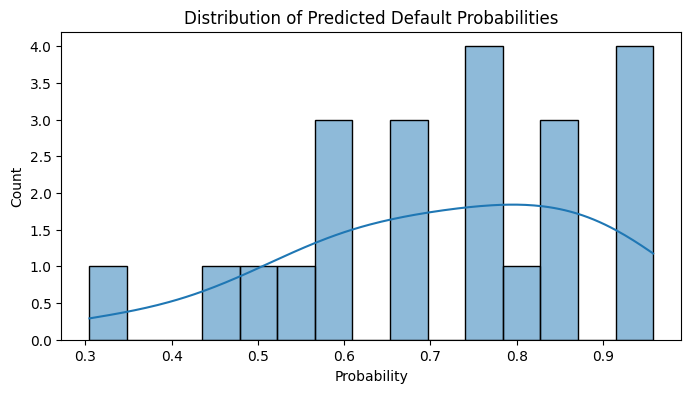

Saved: monitoring_dashboard_outputs\probability_distribution.png


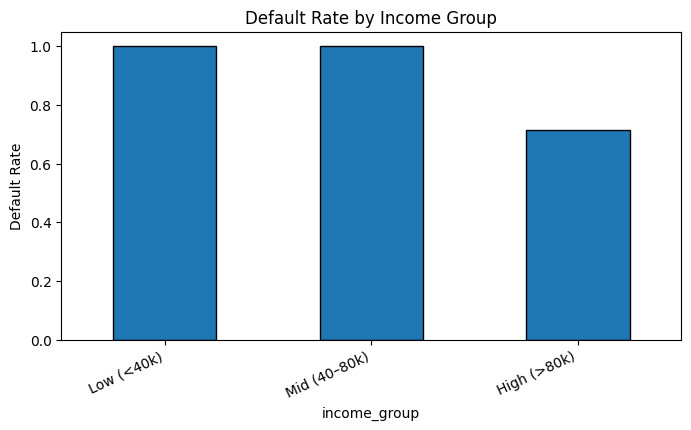

Saved: monitoring_dashboard_outputs\default_rate_by_income_group.png


In [31]:
# -------------------------------
# 1) Probability Distribution Plot
# -------------------------------
plt.figure(figsize=(8, 4))
sns.histplot(df_log["default_probability"], kde=True, bins=15)
plt.title("Distribution of Predicted Default Probabilities")
plt.xlabel("Probability")
plt.ylabel("Count")

prob_plot_path = os.path.join(OUTPUT_DIR, "probability_distribution.png")
plt.savefig(prob_plot_path, bbox_inches="tight", dpi=150)
plt.show()

print("Saved:", prob_plot_path)


# -------------------------------
# 2) Default Rate by Income Group
# -------------------------------
plt.figure(figsize=(8, 4))   # <-- NEW FIGURE (IMPORTANT!)
income_default.plot(kind="bar", edgecolor="black")
plt.title("Default Rate by Income Group")
plt.ylabel("Default Rate")
plt.xticks(rotation=25, ha="right")

income_plot_path = os.path.join(OUTPUT_DIR, "default_rate_by_income_group.png")
plt.savefig(income_plot_path, bbox_inches="tight", dpi=150)
plt.show()

print("Saved:", income_plot_path)


In [32]:
##Latency plot
import os
import matplotlib.pyplot as plt
import seaborn as sns

# assumes df_log already loaded and OUTPUT_DIR exists
if "latency_ms" in df_log.columns:
    # Drop NA just in case
    lat = df_log["latency_ms"].dropna()

    print("Latency stats (ms):")
    display(lat.describe())

    plt.figure(figsize=(8, 4))
    sns.histplot(lat, bins=15)
    plt.title("Prediction Latency Distribution (ms)")
    plt.xlabel("Latency (ms)")
    plt.ylabel("Count")

    latency_plot_path = os.path.join(OUTPUT_DIR, "latency_distribution.png")
    plt.savefig(latency_plot_path, bbox_inches="tight", dpi=150)
    plt.show()

    print("✅ Saved latency plot to:", latency_plot_path)
else:
    print("No 'latency_ms' column found in df_log – latency plot skipped.")


No 'latency_ms' column found in df_log – latency plot skipped.


Old window size: 11, New window size: 11


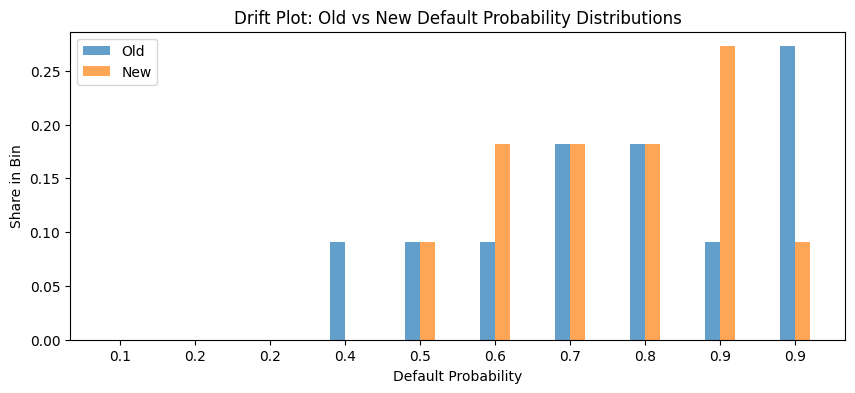

✅ Saved drift plot to: monitoring_dashboard_outputs\drift_probability_old_vs_new.png


In [33]:
##Drift plot:import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Make sure df_log is sorted in time
df_log = df_log.sort_values("timestamp").reset_index(drop=True)

# Split into old and new windows
mid_idx = len(df_log) // 2
old = df_log.iloc[:mid_idx]["default_probability"]
new = df_log.iloc[mid_idx:]["default_probability"]

print(f"Old window size: {len(old)}, New window size: {len(new)}")

if len(old) > 0 and len(new) > 0:
    # Define bins between 0 and 1
    bins = np.linspace(0, 1, 11)  # 10 bins
    bin_centers = 0.5 * (bins[:-1] + bins[1:])

    old_counts, _ = np.histogram(old, bins=bins)
    new_counts, _ = np.histogram(new, bins=bins)

    old_pct = old_counts / old_counts.sum() if old_counts.sum() > 0 else np.zeros_like(old_counts)
    new_pct = new_counts / new_counts.sum() if new_counts.sum() > 0 else np.zeros_like(new_counts)

    # Build a dataframe for easy plotting if you like, but we can just plot directly
    width = 0.02  # bar width

    plt.figure(figsize=(10, 4))
    plt.bar(bin_centers - width/2, old_pct, width=width, label="Old", alpha=0.7)
    plt.bar(bin_centers + width/2, new_pct, width=width, label="New", alpha=0.7)

    plt.title("Drift Plot: Old vs New Default Probability Distributions")
    plt.xlabel("Default Probability")
    plt.ylabel("Share in Bin")
    plt.xticks(bin_centers, [f"{b:.1f}" for b in bin_centers])
    plt.legend()

    drift_plot_path = os.path.join(OUTPUT_DIR, "drift_probability_old_vs_new.png")
    plt.savefig(drift_plot_path, bbox_inches="tight", dpi=150)
    plt.show()

    print("✅ Saved drift plot to:", drift_plot_path)
else:
    print("Not enough data to compute drift plot.")


In [34]:
##Time import
from fastapi import FastAPI
from pydantic import BaseModel
import joblib
import pandas as pd
import os
import csv
from datetime import datetime
import time   # <--- add this


ModuleNotFoundError: No module named 'fastapi'

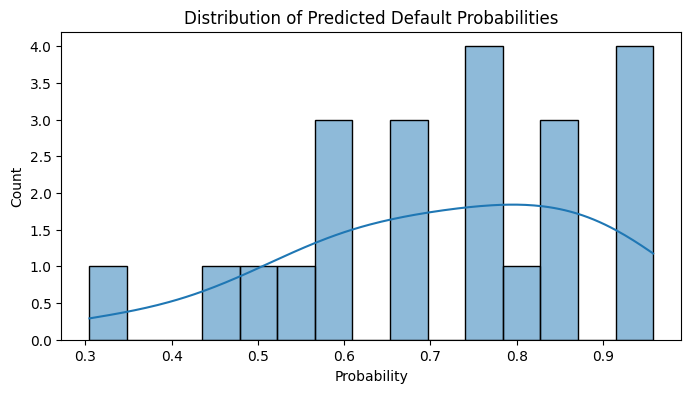

Saved: monitoring_outputs\probability_distribution.png


In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
import os

OUTPUT_DIR = "monitoring_outputs"
os.makedirs(OUTPUT_DIR, exist_ok=True)

# Probability distribution
plt.figure(figsize=(8, 4))
sns.histplot(df_log["default_probability"], kde=True, bins=15)
plt.title("Distribution of Predicted Default Probabilities")
plt.xlabel("Probability")
plt.ylabel("Count")

prob_plot_path = os.path.join(OUTPUT_DIR, "probability_distribution.png")
plt.savefig(prob_plot_path, bbox_inches="tight", dpi=150)
plt.show()

print("Saved:", prob_plot_path)


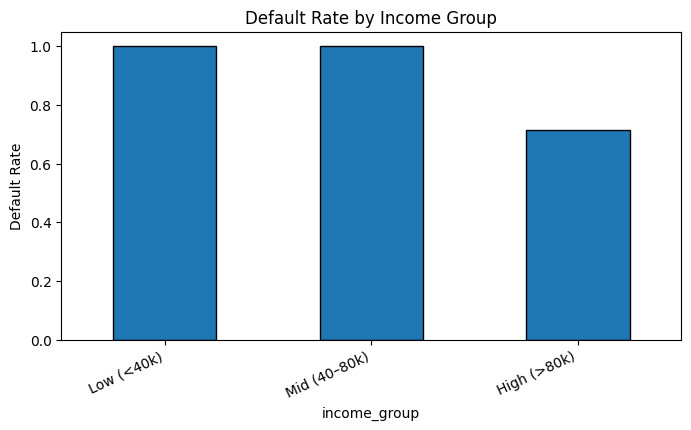

Saved: monitoring_outputs\default_rate_by_income_group.png


In [36]:
plt.figure(figsize=(8, 4))
df_log["income_group"] = pd.cut(
    df_log["income"],
    bins=[0, 40000, 80000, np.inf],
    labels=["Low (<40k)", "Mid (40–80k)", "High (>80k)"]
)

income_default = df_log.groupby("income_group", observed=False)["predicted_default"].mean()

income_default.plot(kind="bar", edgecolor="black")
plt.title("Default Rate by Income Group")
plt.ylabel("Default Rate")
plt.xticks(rotation=25, ha="right")

income_plot_path = os.path.join(OUTPUT_DIR, "default_rate_by_income_group.png")
plt.savefig(income_plot_path, bbox_inches="tight", dpi=150)
plt.show()

print("Saved:", income_plot_path)


In [37]:
from fastapi import FastAPI
from pydantic import BaseModel
import joblib


ModuleNotFoundError: No module named 'fastapi'

In [38]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

OUTPUT_DIR = "monitoring_outputs"
os.makedirs(OUTPUT_DIR, exist_ok=True)

df_log = pd.read_csv("credit_predictions_log.csv", parse_dates=["timestamp"])
df_log.tail()


,timestamp,age,income,loan_amount,loan_duration_months,num_delinquencies,utilization_rate,num_open_accounts,previous_default,home_ownership,employment_status,default_probability,predicted_default
17,2025-11-23 16:08:00.813225,66.0,87540.0,3544.0,36,4,0.33,8,0,OWN,RETIRED,0.491542,0
18,2025-11-23 16:08:00.833919,36.0,137222.0,25700.0,60,1,0.85,8,1,RENT,SELF_EMPLOYED,0.593064,1
19,2025-11-23 16:08:00.857873,52.0,35519.0,29276.0,60,1,0.77,7,0,MORTGAGE,EMPLOYED,0.848864,1
20,2025-11-23 16:08:00.881016,61.0,39105.0,5639.0,48,0,0.64,4,1,RENT,UNEMPLOYED,0.563769,1
21,2025-11-23 16:08:00.900352,63.0,101297.0,18064.0,36,1,0.06,8,1,MORTGAGE,UNEMPLOYED,0.603446,1


In [39]:
if "latency_ms" in df_log.columns:
    print("Latency summary (ms):")
    display(df_log["latency_ms"].describe())

    plt.figure(figsize=(8, 4))
    sns.histplot(df_log["latency_ms"].dropna(), bins=15)
    plt.title("Prediction Latency Distribution (ms)")
    plt.xlabel("Latency (ms)")
    plt.ylabel("Count")

    lat_plot_path = os.path.join(OUTPUT_DIR, "latency_distribution.png")
    plt.savefig(lat_plot_path, bbox_inches="tight", dpi=150)
    plt.show()

    print("Saved latency plot to:", lat_plot_path)
else:
    print("No 'latency_ms' column found in df_log – latency plot skipped.")


No 'latency_ms' column found in df_log – latency plot skipped.
